In [1]:
import bpy
import open3d as o3d
import numpy as np

# Load the .blend file (provide the full path to your .blend file)
blend_file_path = "/home/santhanam.17/8262593/blend/000500.blend"
bpy.ops.wm.open_mainfile(filepath=blend_file_path)
# Get the mesh objects in the scene
mesh_objects = [obj for obj in bpy.context.scene.objects if obj.type == "MESH"]


Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


/home/santhanam.17/anaconda3/envs/blender_3.10/lib/python3.10/site-packages/numpy/core/getlimits.py:549: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/santhanam.17/anaconda3/envs/blender_3.10/lib/python3.10/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)
/home/santhanam.17/anaconda3/envs/blender_3.10/lib/python3.10/site-packages/numpy/core/getlimits.py:549: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/santhanam.17/anaconda3/envs/blender_3.10/lib/python3.10/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  return self._float_to_str(self.smallest_subnormal)


Read blend: /home/santhanam.17/8262593/blend/000500.blend


In [2]:
for obj in mesh_objects:
    print(f"Mesh Object Name: {obj.name}")
    mesh = obj.data
    bpy.context.view_layer.objects.active = obj
    bpy.ops.object.mode_set(mode='EDIT')
    bpy.ops.mesh.select_all(action='SELECT')

    # Triangulate the mesh
    bpy.ops.mesh.quads_convert_to_tris(quad_method='BEAUTY', ngon_method='BEAUTY')

    # Return to object mode
    bpy.ops.object.mode_set(mode='OBJECT')

Mesh Object Name: 264989a2572654787822bac34489b30e


In [3]:
# Access mesh information
for obj in mesh_objects:
    print(f"Mesh Object Name: {obj.name}")
    mesh = obj.data
    print(obj.material_slots[1].material)
    vertices = np.array([vertex.co for vertex in mesh.vertices])
    print(f"Number of Vertices: {len(mesh.vertices)}")
    print(f"Number of Faces: {len(mesh.polygons)}")
    print(f"Number of Edges: {len(mesh.edges)}")
    print("Vertex Coordinates:")
    """for vertex in mesh.vertices:
        print(f" - {vertex.co}")"""
    #faces = [p.loop_indices for p in mesh.polygons]

    faces = []
    vertex_colors = np.zeros((len(mesh.vertices), 3))
    #print(faces)
    for i in mesh.polygons:
        #print([k for k in i.loop_indices])
        faces.append([k for k in i.loop_indices])
    
    """#print(mesh.vertex_colors.loop_colors)
    for loop_index, loop_color in enumerate(mesh.vertex_colors.active.data):
            vertex_colors[loop_index] = loop_color.color
    #print(faces)"""
    o3d_mesh = o3d.geometry.TriangleMesh()
    o3d_mesh.vertices = o3d.utility.Vector3dVector(vertices)
    o3d_mesh.triangles = o3d.utility.Vector3iVector(faces)
    #o3d_mesh.vertex_colors = o3d.utility.Vector3dVector(vertex_colors)
    pcd_o3d = o3d.geometry.PointCloud(o3d.utility.Vector3dVector(vertices))


Mesh Object Name: 264989a2572654787822bac34489b30e
<bpy_struct, Material("Color_009") at 0x55fc670acd48>
Number of Vertices: 17782
Number of Faces: 27562
Number of Edges: 44981
Vertex Coordinates:


13212


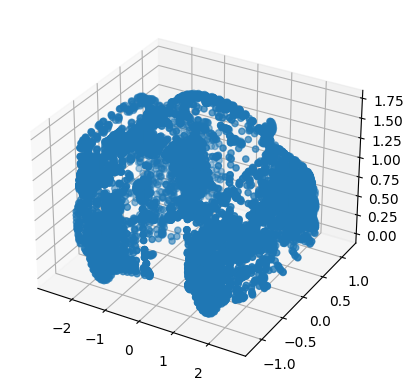

In [4]:

from matplotlib import pyplot as plt
pcd = np.asarray(pcd_o3d.points)
pcd = [x for x in pcd if x[0]!=0 and x[1]!=0]
pcd = np.unique(pcd, axis =0)
print(len(pcd))

"""point_cloud = o3d.geometry.PointCloud()
point_cloud.points = o3d.utility.Vector3dVector(pcd)
point_cloud=o3d.geometry.PointCloud.

pcd=np.asarray(point_cloud.points)"""
list_of_x=[x[0] for x in pcd]
list_of_y=[x[1] for x in pcd]
list_of_z=[x[2] for x in pcd]
ax = plt.axes(projection ='3d')

ax.scatter(list_of_x,list_of_y,list_of_z)

#print(len([x[3] for x in pcd if x[3]!=0]))

In [ ]:
#Mesh extracted from Blend file
o3d_mesh.select_by_index([1])

: 

: 

In [ ]:
o3d_mesh.compute_vertex_normals()

In [ ]:
print("Try to render a mesh with normals (exist: " +
      str(o3d_mesh.has_vertex_normals()) + ") and colors (exist: " +
      str(o3d_mesh.has_vertex_colors()) + ")")
#o3d_mesh.compute_vertex_normals()
o3d_mesh.paint_uniform_color([1, 0.706, 0])
o3d.visualization.draw_geometries([o3d_mesh])
print("A mesh with no normals and no colors does not look good.")

In [13]:
import math
# Create a scene and add the triangle mesh.

rotation_angle=math.radians(10)
Transformation_Matrix= np.eye(4)
Transformation_Matrix[0,0]=math.cos(rotation_angle)
Transformation_Matrix[0,1]=-math.sin(rotation_angle)
Transformation_Matrix[1,0]=math.sin(rotation_angle)
Transformation_Matrix[1,1]=math.cos(rotation_angle)
Transformation_Matrix[0,3]=0
Transformation_Matrix[1,3]=0
Transformation_Matrix[2,3]=0
o3d_mesh.transform(Transformation_Matrix)
cube = o3d.t.geometry.TriangleMesh.from_legacy(o3d_mesh)
scene = o3d.t.geometry.RaycastingScene()
cube_id=scene.add_triangles(cube)


13284


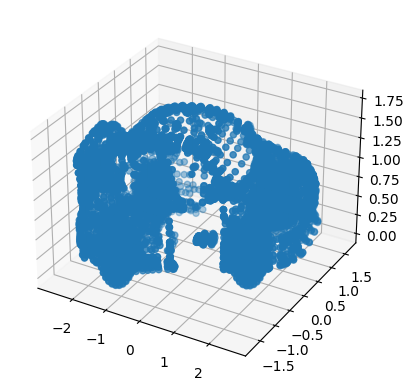

In [14]:

from matplotlib import pyplot as plt
pcd_o3d = o3d.geometry.PointCloud(o3d_mesh.vertices)
pcd = np.asarray(pcd_o3d.points)
pcd = [x for x in pcd if x[0]!=0 and x[1]!=0]
pcd = np.unique(pcd, axis =0)
print(len(pcd))

"""point_cloud = o3d.geometry.PointCloud()
point_cloud.points = o3d.utility.Vector3dVector(pcd)
point_cloud=o3d.geometry.PointCloud.

pcd=np.asarray(point_cloud.points)"""
list_of_x=[x[0] for x in pcd]
list_of_y=[x[1] for x in pcd]
list_of_z=[x[2] for x in pcd]
ax = plt.axes(projection ='3d')

ax.scatter(list_of_x,list_of_y,list_of_z)

#print(len([x[3] for x in pcd if x[3]!=0]))

In [ ]:
cube.triangle

In [7]:
np.asarray(o3d_mesh)

array(TriangleMesh with 17782 points and 27562 triangles., dtype=object)

In [22]:

import random
rays=[]
for i in np.arange(-1,10,0.08):
    for k in np.arange(-24.8,3,0.4):
        key_tuple=(i,k)
        rays.append([[-5,random.uniform(i+0.01,i-0.01),random.uniform(k+0.1,k-0.1)]])

In [23]:
len(rays)

9660

In [ ]:
rays

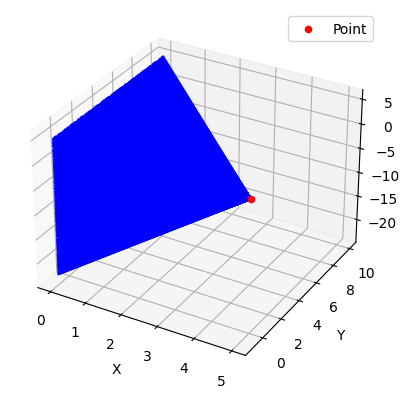

In [24]:
from matplotlib import pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
start=[5,0,2]
X=start[0]
Y=start[1]
Z=start[2]
# Plot the point
ax.scatter(X, Y, Z, color='r', label='Point')

for i in rays:
    
    direction_vector = np.array(i[0])
    origin = np.array(start)
    end_point = origin + direction_vector
    ax.plot([X, end_point[0]], [Y, end_point[1]], [Z, end_point[2]], color='b')

# Set labels and legend
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
plt.show()

In [25]:

cube_id=scene.add_triangles(cube)
#dict={}
pcd_list=[]
primitive_normals=[]
#rays=dictionary.values()
for i in rays:
    ray1 = o3d.core.Tensor([[5, 0, 2, i[0][0], i[0][1], -i[0][2]]],
                        dtype=o3d.core.Dtype.Float32)
    
    ans1 = scene.cast_rays(ray1)
    #hit = ans1['primitive_normals'].numpy()
    #print(hit)
    """print(ans1['primitive_uvs'].numpy())
    print(ans1['primitive_ids'].numpy())
    
    print(ans1['geometry_ids'].numpy())"""
    #print(ans1['primitive_normals'].numpy())
    
    hit = ans1['t_hit'].isfinite()

    points = ray1[hit][:,:3] + ray1[hit][:,3:]*ans1['t_hit'][hit].reshape((-1,1))
    
    #pcd_points = o3d.t.geometry.PointCloud()
    if hit:
        pcd_list.append(points.numpy()[0])
        primitive_normals.append(ans1['primitive_normals'].numpy()[0])
        
        #pcd_points.

#ans2 = scene.cast_rays(ray2)
#print(cube_id)

In [19]:
print(len(np.array(pcd_list)))
print(len(np.array(primitive_normals)))

289
289


In [27]:
primitive_normals

[array([ 0.28895122, -0.90324223,  0.31727076], dtype=float32),
 array([ 0.34383735, -0.93899155,  0.00840899], dtype=float32),
 array([-0.3167517 ,  0.9440626 , -0.09172964], dtype=float32),
 array([-0.66813695,  0.74371743, -0.02184831], dtype=float32),
 array([-0.3167517 ,  0.9440626 , -0.09172964], dtype=float32),
 array([-0.3167517 ,  0.9440626 , -0.09172964], dtype=float32),
 array([-0.31124616,  0.83364236, -0.45625243], dtype=float32),
 array([ 0.7639163 , -0.59241563,  0.25588194], dtype=float32),
 array([ 0.80833375, -0.5809192 ,  0.09554823], dtype=float32),
 array([-0.33750638,  0.9399965 ,  0.04995971], dtype=float32),
 array([-0.42226702,  0.8986769 ,  0.1186189 ], dtype=float32),
 array([0.9289389 , 0.33485037, 0.15794806], dtype=float32),
 array([ 0.9637114 , -0.16677566,  0.20843782], dtype=float32),
 array([-0.37957293,  0.38763678, -0.8400369 ], dtype=float32),
 array([-0.37957293,  0.38763678, -0.8400369 ], dtype=float32),
 array([-0.43294883,  0.90141857,  0.      

In [28]:
pcd_list

[array([-0.35594702, -1.0774865 ,  1.2276156 ], dtype=float32),
 array([ 0.4772277 , -0.8991506 ,  0.83061147], dtype=float32),
 array([ 0.24724579, -0.947328  ,  0.4304471 ], dtype=float32),
 array([-0.4827218, -1.0018924,  1.100933 ], dtype=float32),
 array([ 0.47028017, -0.82865983,  0.88159347], dtype=float32),
 array([ 0.66826487, -0.7911328 ,  0.5841539 ], dtype=float32),
 array([-0.07592678, -0.85457057,  1.5100298 ], dtype=float32),
 array([-0.22472477, -0.8841236 ,  1.1421728 ], dtype=float32),
 array([-0.17705727, -0.87442535,  0.8589965 ], dtype=float32),
 array([ 1.1430821 , -0.6529812 ,  0.75633717], dtype=float32),
 array([ 1.4289236, -0.5942115,  0.6384349], dtype=float32),
 array([-0.32232666, -0.7991134 ,  1.6391932 ], dtype=float32),
 array([-0.22940207, -0.80251014,  1.1563985 ], dtype=float32),
 array([ 0.04888916, -0.75173706,  0.73561275], dtype=float32),
 array([ 0.38585472, -0.6995605 ,  0.6074307 ], dtype=float32),
 array([ 1.651881  , -0.5116621 ,  0.39511526]

In [20]:
original_pcd =o3d.geometry.PointCloud()
original_pcd.points=o3d.utility.Vector3dVector(pcd_list)

In [ ]:
original_pcd

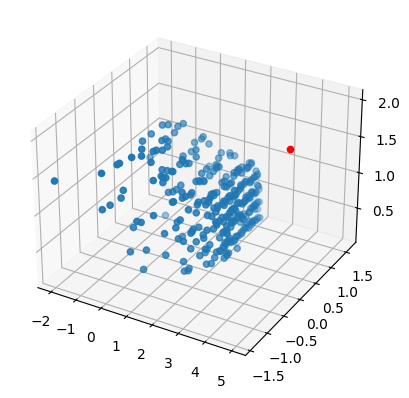

In [26]:

pcd = np.asarray(original_pcd.points)
#pcd = [x for x in pcd if x[0]!=0 and x[1]!=0]
#pcd = np.unique(pcd, axis =0)
#print(pcd)

"""point_cloud = o3d.geometry.PointCloud()
point_cloud.points = o3d.utility.Vector3dVector(pcd)
point_cloud=o3d.geometry.PointCloud.

pcd=np.asarray(point_cloud.points)"""
start=[5,0,2]
X=start[0]
Y=start[1]
Z=start[2]
# Plot the point


list_of_x=[x[0] for x in pcd]
list_of_y=[x[1] for x in pcd]
list_of_z=[x[2] for x in pcd]
ax = plt.axes(projection ='3d')
ax.scatter(X, Y, Z, color='r', label='Point')
ax.scatter(list_of_x,list_of_y,list_of_z)

In [ ]:
from matplotlib import pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
start=[5,0,2]
X=start[0]
Y=start[1]
Z=start[2]
# Plot the point
ax.scatter(X, Y, Z, color='r', label='Point')

for i,j in zip(pcd_list,primitive_normals):
    
    direction_vector = np.array(j[0])
    origin = np.array(i[0])
    X=j[0][0]
    Y=j[0][1]
    Z=j[0][2]
    end_point = origin - direction_vector
    ax.plot([X, end_point[0]], [Y, end_point[1]], [Z, end_point[2]], color='r')

# Set labels and legend
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
plt.show()

In [ ]:
pcd
#pcd_list
pcd_points = o3d.t.geometry.PointCloud(points)

original_pcd=pcd_list.to_legacy()
original_pcd.points


In [ ]:
rays = o3d.t.geometry.RaycastingScene.create_rays_pinhole(
    fov_deg=90,
    center=[-2, 0, 2],
    eye=[2, 3, 0],
    up=[0, 0, 0],
    width_px=640,
    height_px=480,
)

ans = scene.cast_rays(rays)
cube_id=scene.add_triangles(cube)
print(cube_id)

In [ ]:
#print(dict)
import torch
print(dict[9])
print(ans1['primitive_uvs'])

In [ ]:
hit = ans1['t_hit'].isfinite()
points = ray1[hit][:,:3] + ray1[hit][:,3:]*ans1['t_hit'][hit].reshape((-1,1))
print(points)
pcd_points = o3d.t.geometry.PointCloud(points)

In [ ]:
original_pcd=pcd_points.to_legacy()
original_pcd.points

In [ ]:
pcd = np.asarray(original_pcd.points)
#pcd = [x for x in pcd if x[0]!=0 and x[1]!=0]
#pcd = np.unique(pcd, axis =0)
print(pcd)

"""point_cloud = o3d.geometry.PointCloud()
point_cloud.points = o3d.utility.Vector3dVector(pcd)
point_cloud=o3d.geometry.PointCloud.

pcd=np.asarray(point_cloud.points)"""
list_of_x=[x[0] for x in pcd]
list_of_y=[x[1] for x in pcd]
list_of_z=[x[2] for x in pcd]
ax = plt.axes(projection ='3d')

ax.scatter(list_of_x,list_of_y,list_of_z)

In [ ]:
pcd

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(ans['t_hit'].numpy())